### To do
- plot client also
    - subplots?
- document notebook
- 3D plots
- change file names 
    corpus_a, ----

In [12]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
#from StringIO import StringIO
%matplotlib inline

In [2]:
data_dir = "/home/walter/Dropbox/S2DS - M&S/Data/Walter"
def get_file_path(data_dir,file_name):
    return data_dir + "/" + file_name + ".txt"
code_dir = "/home/walter/Dropbox/S2DS - M&S/DevCode/MS/Walter"
%cd $code_dir"/cca-master"

/home/walter/Dropbox/S2DS - M&S/DevCode/MS/Walter/cca-master


In [6]:
import gensim as gs
file_name     = "clientMessages"
bigram = gs.models.Phrases(get_file_path(data_dir,file_name))
print bigram

Phrases<27 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [30]:
import gensim as gs
#file_name     = "clientMessages"
file_name     = "agentMessages"
svFile=open(get_file_path(data_dir,file_name),'r')

chats = list()
for i in range(10000):
    chats_words = svFile.readline().split()
    for word in chats_words:
        chats.append(word.decode('utf-8'))
#print chats

import collections
#words = ['all', 'awesome', 'all', 'yeah', 'bye', 'all', 'yeah']
counter = collections.Counter(chats)
print(counter.most_common())

bigram = gs.models.Phrases(chats)
print bigram[['Spencer'.decode('utf-8')]]


[(u'the', 10475), (u'you', 9069), (u'I', 8343), (u'to', 8330), (u'your', 6238), (u'for', 5971), (u'and', 3688), (u'a', 3368), (u'will', 3278), (u'can', 2994), (u'have', 2859), (u'of', 2859), (u'this', 2676), (u'be', 2570), (u'with', 2457), (u'me', 2316), (u'that', 2254), (u'in', 2194), (u'is', 2097), (u'am', 2038), (u'sorry', 1886), (u'on', 1780), (u'order', 1663), (u'it', 1643), (u'email', 1515), (u'Please', 1478), (u'please', 1414), (u'Thanks', 1383), (u'help', 1331), (u'our', 1311), (u'as', 1301), (u'are', 1294), (u'you.', 1168), (u'not', 1140), (u'an', 1067), (u'chat', 1063), (u'using', 1034), (u'hear', 1008), (u'check', 999), (u'Marks', 978), (u'Spencer', 971), (u'rest', 963), (u'&', 952), (u'we', 948), (u'card', 947), (u'Web', 897), (u'do', 879), (u'that.', 875), (u'day.', 869), (u'allow', 847), (u'if', 844), (u'so', 842), (u'address', 756), (u'while', 739), (u'from', 738), (u'see', 727), (u'-', 718), (u'there', 715), (u'any', 688), (u'still', 687), (u'account', 658), (u'You', 64

In [31]:
bigram = gs.models.Phrases(chats)
print bigram[['spencer'.decode('utf-8')]]


[u'spencer']


In [19]:
window_lenght = 10
kappa         = 2
#file_name     = "agentMessages"
file_name     = "clientMessages"

file_path = '"' + data_dir + "/" + file_name + ".txt" + '"'
cca_dir   = '"' + data_dir + "/" + file_name + ".cutoff1.window" + str(window_lenght) + "/" + '"'

!python cca.py --corpus $file_path --cutoff 1 --window $window_lenght;
!python cca.py --stat   $cca_dir   --no_matlab --m 2 --kappa $kappa

/home/walter/Dropbox/S2DS - M&S/Data/Walter/clientMessages.1grams exists
Reading unigrams
Cutoff 1: keep 49091 out of 157896 words (97.45% unigram mass)
	
Creating directory /home/walter/Dropbox/S2DS - M&S/Data/Walter/clientMessages.cutoff1.window10
m: 2
kappa: 2
XYstats: /home/walter/Dropbox/S2DS - M&S/Data/Walter/clientMessages.cutoff1.window10/XY
Xstats: /home/walter/Dropbox/S2DS - M&S/Data/Walter/clientMessages.cutoff1.window10/X
Ystats: /home/walter/Dropbox/S2DS - M&S/Data/Walter/clientMessages.cutoff1.window10/Y

Start time: 2016-08-07 12:40:08
________________________________________
Omega: dimensions 49092 x 441828, 9943699 nonzeros
Computing 2 left singular vectors U of Omega...
________________________________________
End time: 2016-08-07 12:40:19
Total time: 0:00:11

Storing singular values at: output/clientMessages.cutoff1.window10.m2.kappa2.out/sv
Storing row-normalized U at: output/clientMessages.cutoff1.window10.m2.kappa2.out/Ur


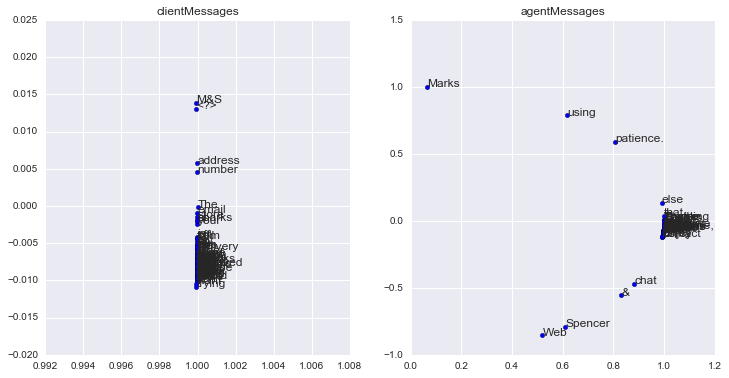

In [32]:
def plot_coocurrence_svd(file_name,Ur_filename,words_number=100):
    svFile=open(Ur_filename,'r')

    words = list()
    vectors = np.empty([words_number, 2])
    for i in range(words_number):
        L1list = svFile.readline()
        [frequency,word, val_1, val_2] = L1list.split()
        words.append(word.decode('utf8') )
        vectors[i,0] = val_1
        vectors[i,1] = val_2
    #print words
    #print vectors

    plt.scatter(vectors[:,0], vectors[:,1])
    for word, x, y in zip(words, vectors[:,0], vectors[:,1]):
        sb.plt.annotate(word, (x, y), size=12)
    
    plt.title(file_name)

def get_Ur_filename(code_dir,file_name,window_lenght,kappa):
    return code_dir + "/cca-master/output/"+ file_name +".cutoff1.window"+\
    str(window_lenght) + ".m2.kappa" + str(kappa) + ".out/Ur"

plt.figure(num=None, figsize=(12, 6))

plt.subplot(1,2,1)
file_name     = "clientMessages"
Ur_filename = get_Ur_filename(code_dir,file_name,window_lenght,kappa)
plot_coocurrence_svd(file_name,Ur_filename)

plt.subplot(1,2,2)
file_name     = "agentMessages"
Ur_filename = get_Ur_filename(code_dir,file_name,window_lenght,kappa)
plot_coocurrence_svd(file_name,Ur_filename)

### CCA documentation

In [ ]:
# %load README
Author: Karl Stratos (stratos@cs.columbia.edu)

Release version: 1.0
                                      
Requirements: python (2.7), numpy, scipy, sparsesvd, Matlab

This program is an implementation of canoncial correlation analysis (CCA) in 
the context of deriving word embeddings. A theoretical justification of this 
implementation is provided in: 

A spectral algorithm for learning class-based n-gram models of natrual language
Karl Stratos, Do-kyum Kim, Michael Collins, and Daniel Hsu.
In Proceedings of UAI (2014).

v------------------------------------------------------------------------------v
| Setup                                                                        |
^------------------------------------------------------------------------------^
First, make sure your machine has all the required programs listed above. Also,
to be able to run Matlab on your machine, you need to change the line in the
call_matlab function in src/call_matlab.py to the path to Matlab on that 
machine. For example, for me it's: 

matlab = '/Applications/MATLAB_R2013b.app/bin/matlab' 

The easiest way to check everything is good is to run debug.py: 

$ python debug.py

v------------------------------------------------------------------------------v
| Preparing input data                                                         |
^------------------------------------------------------------------------------^
We assume a raw (but properly tokenized) text corpus as an input. There is no 
restriction such as 'one sentence per line'---we don't need sentence boundaries.
But sentence boundaries can be incorporated as special tokens. For example, 
there is a toy corpus input/example/example.corpus:

the dog saw the cat
the dog barked
the cat meowed

You can put boundary markers, as in:

_START_ the dog saw the cat _END_
_START_ the dog barked _END_
_START_ the cat meowed _END_

v------------------------------------------------------------------------------v
| Step 1: Deriving statistics                                                  |
^------------------------------------------------------------------------------^
In step 1, we extract co-occurrence statistics. For example, running:

python cca.py --corpus input/example/example.corpus --cutoff 1

will create a directory input/example/example.cutoff1.window3/ that contains 
statistics of example.corpus. The command line arguments for step 1 are 
the following:

  --corpus CORPUS  count words from this corpus
  --cutoff CUTOFF  cut off words appearing <= this number
  --vocab VOCAB    size of the vocabulary
  --window WINDOW  size of the sliding window
  --want WANT      want words in this file
  --rewrite        rewrite the (processed) corpus, not statistics

In particular, you can decide the context (window)---the default is 3, i.e., 
previous/next words. You can control the size of the vocabulary by discarding 
rare words (cutoff) or using only a restricted set of vocabulary (vocab). 

Rare words are all replaced by a special token "<?>".

v------------------------------------------------------------------------------v
| Step 2: Deriving embeddings Ur                                               |
^------------------------------------------------------------------------------^
In step 2, we run Matlab to perform SVD on the statistics from step 1. Running:

python cca.py --stat input/example/example.cutoff1.window3/ --m 2 --kappa 2

will create a directory output/example.cutoff1.window3.m2.kappa2.matlab.out/
that contains the word embedding file Ur:

4 the -2.3410244894135657e-01 -9.7221193337649348e-01
3 <?> -8.6218169891930729e-01 -5.0659916901690338e-01
2 dog -9.3955297838817597e-01 3.4240356423657153e-01
2 cat -9.6347323867084655e-01 2.6780462722871301e-01

where the format of each line is <frequency>, <word>, <val_1>, <val_2>, ..., 
<val_m>. Also, the rows are ordered in decreasing frequency. 

The command line arguments for step 2 are the following:

  --stat STAT      directory containing statistics
  --m M            number of dimensions
  --kappa KAPPA    smoothing parameter
  --quiet          quiet mode
  --no_matlab      do not call matlab - use python sparsesvd

In particular, m is the dimensionality of CCA, and kappa is a "pseudocount". 
The value of kappa needs to be tuned for the given corpus. Try experimenting 
with 50, 100, 200, ... (or if your data is huge like Google Ngram, 1000, 2000, 
...) until the performance on your problem stops improving. Matlab's SVD is 
very fast, so you can try many parameter values with ease. 

v------------------------------------------------------------------------------v
| Optional post processing                                                     |
^------------------------------------------------------------------------------^
Depending on your problem, it might be a good idea to use only the top subspace 
of your word embeddings. You can derive lower dimensional embeddings via 
principal component analysis (PCA), e.g.:

python src/pca.py --embedding_file output/example.cutoff1.window3.m2.kappa2.matlab.out/Ur --pca_dim 1

Now you have a file Ur.pca1 that looks like:

4 the 0.906265637029
3 <?> 0.20812022154
2 dog -0.585143449361
2 cat -0.529242409207

